# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.161902e+01     7.516397e+00
 * time: 0.004685163497924805
     1     2.809542e+01     5.018635e+00
 * time: 0.013589143753051758
     2     2.390692e+01     8.025437e+00
 * time: 0.03474617004394531
     3     1.395342e+01     2.520798e+00
 * time: 0.05956101417541504
     4     1.296331e+01     3.000743e+00
 * time: 0.07623720169067383
     5     1.221544e+01     1.375610e+00
 * time: 0.0928959846496582
     6     1.089393e+01     1.342531e+00
 * time: 0.20077109336853027
     7     1.035745e+01     1.522654e+00
 * time: 0.2169780731201172
     8     1.002848e+01     1.149901e+00
 * time: 0.23292016983032227
     9     9.743147e+00     6.653244e-01
 * time: 0.24879813194274902
    10     9.601486e+00     5.782482e-01
 * time: 0.26467013359069824
    11     9.491140e+00     4.881210e-01
 * time: 0.280501127243042
    12     9.471998e+00     7.684078e-01
 * time: 0.292478084564209
    13     9.404589e+00     6.473419e-01
 * time: 0.3

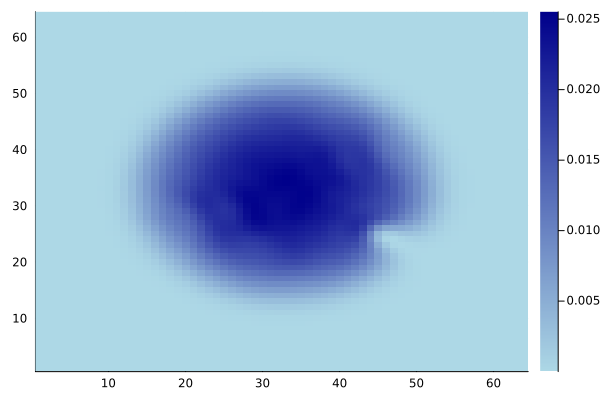

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)